<a href="https://colab.research.google.com/github/jinyjib98/Try_Examples/blob/main/%5B1%EC%B0%A8_%EC%A0%9C%EC%B6%9C%5D_n133a_high_dimensional_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

In [118]:
# matrix 구현
mat = np.array([
                [4,2],
                [2,4]
                ])

# np.linalg.eig - 고유값, 고유벡터 도출
value, vector = np.linalg.eig(mat)

print('value is :',value)
print('vector is : \n', vector)

value is : [6. 2.]
vector is : 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [135]:
# 데이터셋 불러오기
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [136]:
# NaN 값 있는 행 제거
df1 = df.dropna()

# 인덱스 재정렬 후 index 열 제거
df2 = df1.reset_index()
df3 = df2.drop(['index'],axis = 1)

# copy한 후 원하는 열만 추출 (후에 다시 species 열 사용해야 하기 때문)
df4 = df3.copy()
df5 = df4[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

df = df5
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [137]:
# Standardization
# 평균 0, 표준편차 1인 표준정규분포로 만들어주는 것
scaler = StandardScaler()
data = scaler.fit_transform(df)

# PCA
pca = PCA(2) # 2차원으로 차원 축소

# pca.fit(df)

df_pca = pca.fit_transform(data)

ratio = pca.explained_variance_ratio_

print(ratio)

[0.68633893 0.19452929]


In [133]:
# 분류기준 설정 (by species)
after_pca = pd.DataFrame(df_pca)

after_pca = pd.concat([after_pca, df3['species']], axis = 1)
after_pca

,0,1,species
0,-1.853593,0.032069,Adelie
1,-1.316254,-0.443527,Adelie
2,-1.376605,-0.161230,Adelie
3,-1.885288,-0.012351,Adelie
4,-1.919981,0.817598,Adelie
...,...,...,...
328,1.997716,-0.976771,Gentoo
329,1.832651,-0.784510,Gentoo
330,2.751505,0.266556,Gentoo
331,1.713854,-0.725875,Gentoo


Text(0, 0.5, 'PC2')

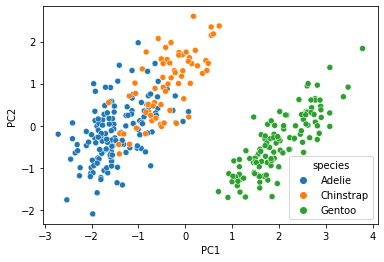

In [141]:
# scatterplot으로 시각화
sns.scatterplot(x= after_pca[0], y= after_pca[1], data= after_pca, hue= 'species')

plt.xlabel('PC1')
plt.ylabel('PC2')

## 🔥 도전 과제

### "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [ ]:
# 이곳에 답안을 작성하시기 바랍니다